### Model Building and Evaluation

Training: XGBoost

In [1]:
import pandas as pd
import time
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv("transformed_land_mines.csv")

# Prepare data
X = df.drop(columns=["M","V"])
y = df["M"]-1

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(
    eval_metric="logloss",  
    booster="dart",  # Dropout-based boosting  
    n_estimators=1000,  
    max_depth=10,  
    learning_rate=0.7,  
    subsample=0.8,  
    colsample_bytree=0.8,  
    reg_lambda=18,
    reg_alpha=0.6,  # L2 regularization term (adjust this value as needed)
)



# Train
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ XGBoost Accuracy: {accuracy:.4f}")
print(f"🕒 Training Time: {end_time - start_time:.2f} seconds")
print(classification_report(y_test, y_pred))

# Save model
joblib.dump(model, "xgboost_model.pkl")


✅ XGBoost Accuracy: 0.5294
🕒 Training Time: 52.80 seconds
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.92      0.92      0.92        12
           2       0.54      0.44      0.48        16
           3       0.30      0.55      0.39        11
           4       0.45      0.28      0.34        18

    accuracy                           0.53        68
   macro avg       0.56      0.56      0.55        68
weighted avg       0.55      0.53      0.53        68



['xgboost_model.pkl']

Training: CatBoost

In [1]:
import pandas as pd
import time
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier

# Load dataset
df = pd.read_csv("transformed_land_mines.csv")

# Prepare data
X = df.drop(columns=["M", "V"])
y = df["M"] - 1

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = CatBoostClassifier(iterations=250, eval_metric="Accuracy", verbose=50)

# Train
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ CatBoost Accuracy: {accuracy:.4f}")
print(f"🕒 Training Time: {end_time - start_time:.2f} seconds")
print(classification_report(y_test, y_pred))

# Save model
joblib.dump(model, "catboost_model.pkl")


Learning rate set to 0.238816
0:	learn: 0.5592593	total: 53.4ms	remaining: 13.3s
50:	learn: 0.8592593	total: 111ms	remaining: 432ms
100:	learn: 0.9703704	total: 157ms	remaining: 231ms
150:	learn: 0.9925926	total: 207ms	remaining: 135ms
200:	learn: 1.0000000	total: 254ms	remaining: 62ms
249:	learn: 1.0000000	total: 298ms	remaining: 0us
✅ CatBoost Accuracy: 0.5882
🕒 Training Time: 0.38 seconds
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.85      0.92      0.88        12
           2       0.53      0.50      0.52        16
           3       0.40      0.55      0.46        11
           4       0.45      0.28      0.34        18

    accuracy                           0.59        68
   macro avg       0.59      0.63      0.60        68
weighted avg       0.58      0.59      0.57        68



['catboost_model.pkl']

Training: Logistic Regression

In [2]:
import pandas as pd
import time
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("transformed_land_mines.csv")

# Prepare data
X = df.drop(columns=["M", "V_log"])
y = df["M"] - 1  # Adjust target variable if necessary

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, solver="lbfgs", multi_class="auto")

# Train
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Logistic Regression Accuracy: {accuracy:.4f}")
print(f"🕒 Training Time: {end_time - start_time:.2f} seconds")
print(classification_report(y_test, y_pred))

# Save model
joblib.dump(model, "logistic_regression_model.pkl")
print("🎉 Model saved as 'logistic_regression_model.pkl'")


✅ Logistic Regression Accuracy: 0.4412
🕒 Training Time: 0.01 seconds
              precision    recall  f1-score   support

           0       0.52      0.87      0.65        15
           1       0.88      1.00      0.93        14
           2       0.25      0.15      0.19        13
           3       0.00      0.00      0.00        13
           4       0.08      0.08      0.08        13

    accuracy                           0.44        68
   macro avg       0.34      0.42      0.37        68
weighted avg       0.36      0.44      0.39        68

🎉 Model saved as 'logistic_regression_model.pkl'


/workspaces/FDS_MiniProject/FDS/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training: Random Forest

In [ ]:
import pandas as pd
import time
import joblib
import optuna
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("transformed_land_mines.csv")

# Prepare data
X = df.drop(columns=["M", "V"])
y = df["M"] - 1  # Adjusting target as M - 1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Objective function to optimize hyperparameters
def objective(trial):
    # Suggest hyperparameters using optuna
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 10, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    
    # Removing 'auto' and allowing only valid options for max_features
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    # Initialize the RandomForest model with suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42
    )

    # Fit the model
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create a study to maximize accuracy
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=150)  # You can adjust n_trials for more trials

# Output the best hyperparameters and best accuracy
print(f"Best Hyperparameters: {study.best_params}")
print(f"Best Accuracy: {study.best_value:.4f}")

# Train the final model using the best hyperparameters
best_params = study.best_params
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate the final model
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Final RandomForest Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Save the final model
joblib.dump(final_model, "best_randomforest_model_optuna.pkl")


✅ RandomForest Accuracy: 0.5294
🕒 Training Time: 0.29 seconds
              precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.85      0.92      0.88        12
           2       0.42      0.31      0.36        16
           3       0.38      0.55      0.44        11
           4       0.33      0.22      0.27        18

    accuracy                           0.53        68
   macro avg       0.53      0.58      0.54        68
weighted avg       0.50      0.53      0.51        68



['randomforest_model.pkl']

Training: Extra Trees

In [8]:
import pandas as pd
import time
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("transformed_land_mines.csv")

# Prepare data
X = df.drop(columns=["M","V"])
y = df["M"]-1

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = ExtraTreesClassifier(n_estimators=250, random_state=42)

# Train
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ ExtraTrees Accuracy: {accuracy:.4f}")
print(f"🕒 Training Time: {end_time - start_time:.2f} seconds")
print(classification_report(y_test, y_pred))

# Save model
joblib.dump(model, "extratrees_model.pkl")


✅ ExtraTrees Accuracy: 0.4706
🕒 Training Time: 0.24 seconds
              precision    recall  f1-score   support

           0       0.62      0.91      0.74        11
           1       0.85      0.92      0.88        12
           2       0.25      0.19      0.21        16
           3       0.36      0.45      0.40        11
           4       0.23      0.17      0.19        18

    accuracy                           0.47        68
   macro avg       0.46      0.53      0.49        68
weighted avg       0.43      0.47      0.44        68



['extratrees_model.pkl']

Training: SVM

In [32]:
import pandas as pd
import time
import joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("transformed_land_mines.csv")

# Prepare data
X = df.drop(columns=["M","V"])
y = df["M"]-1

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = SVC(kernel="rbf", probability=True)

# Train
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ SVM Accuracy: {accuracy:.4f}")
print(f"🕒 Training Time: {end_time - start_time:.2f} seconds")
print(classification_report(y_test, y_pred))

# Save model
joblib.dump(model, "svm_model.pkl")


✅ SVM Accuracy: 0.3676
🕒 Training Time: 0.02 seconds
              precision    recall  f1-score   support

           0       0.24      0.82      0.37        11
           1       1.00      0.92      0.96        12
           2       0.20      0.12      0.15        16
           3       0.50      0.09      0.15        11
           4       0.29      0.11      0.16        18

    accuracy                           0.37        68
   macro avg       0.44      0.41      0.36        68
weighted avg       0.42      0.37      0.33        68



['svm_model.pkl']

MLP Classifer

In [ ]:
import pandas as pd
import joblib
import optuna
import time

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("transformed_land_mines.csv")

# Prepare features and labels
X = df.drop(columns=["M", "V"])
y = df["M"] - 1  # Target adjustment

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional train-test split for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Objective function for Optuna
def objective(trial):
    hidden_layer_sizes = trial.suggest_categorical("hidden_layer_sizes", [(64,), (128,), (64, 64), (128, 64), (128, 128)])
    activation = trial.suggest_categorical("activation", ["relu", "tanh"])
    solver = trial.suggest_categorical("solver", ["adam", "sgd"])
    alpha = trial.suggest_float("alpha", 1e-5, 1e-2, log=True)
    learning_rate_init = trial.suggest_float("learning_rate_init", 1e-4, 1e-1, log=True)
    max_iter = trial.suggest_int("max_iter", 200, 800)

    clf = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        alpha=alpha,
        learning_rate_init=learning_rate_init,
        max_iter=max_iter,
        random_state=42
    )

    # Use cross-validation
    accuracy = cross_val_score(clf, X_scaled, y, cv=5, scoring="accuracy").mean()
    return accuracy

# Run Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Output best result
print(f"🔧 Best Hyperparameters:\n{study.best_params}")
print(f"🏆 Best CV Accuracy: {study.best_value:.4f}")

# Train final model with best params
best_params = study.best_params
final_model = MLPClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate final model
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n✅ Final MLP Accuracy: {accuracy:.4f}")
print(f"\n📊 Classification Report:\n{classification_report(y_test, y_pred)}")

# Save model and scaler
joblib.dump(final_model, "best_mlp_model_optuna.pkl")
joblib.dump(scaler, "mlp_scaler.pkl")


MLPClassifier Model(with higher accuracy)

In [ ]:
import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("transformed_land_mines.csv")

# Prepare features and labels
X = df.drop(columns=["M", "V"])
y = df["M"] - 1  # Adjusted target labels

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)



# Use best hyperparameters from Optuna study
best_params = {
    'hidden_layer_sizes': (64, 64),
    'activation': 'tanh',
    'solver': 'adam',
    'alpha': 0.0009747463996145735,
    'learning_rate_init': 0.0018593430004181788,
    'max_iter': 676
}

# Initialize and train the MLP model
mlp_model = MLPClassifier(**best_params, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict and evaluate on test data
y_pred = mlp_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Final MLP Accuracy: {accuracy:.4f}")
print(f"\n📊 Classification Report:\n{classification_report(y_test, y_pred)}")

# Save the final model and scaler
joblib.dump(mlp_model, "final_mlp_model.pkl")
joblib.dump(scaler, "mlp_scaler.pkl")


In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_csv("transformed_land_mines.csv")
X = df.drop(columns=["M", "V"])
y = df["M"] - 1

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Final MLP model with best Optuna hyperparameters
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 128, 64),
    activation="relu",
    solver="adam",
    alpha=0.00022155272099481024,
    learning_rate_init=0.038373306648018864,
    max_iter=645,
    random_state=42
)

# Train the model
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

# Evaluation
print(f"✅ Final MLP Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"\n📊 Classification Report:\n{classification_report(y_test, y_pred)}")

# Save model and scaler
joblib.dump(mlp, "mlp_final_optuna_relu.pkl")
joblib.dump(scaler, "scaler_final_optuna_relu.pkl")


MLP_Classifier Improved

In [ ]:
import pandas as pd
import joblib
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv("transformed_land_mines.csv")
X = df.drop(columns=["M", "V"])
y = df["M"] - 1

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Optuna objective function with pruning
def objective(trial):
    hidden_layer_sizes = trial.suggest_categorical(
        "hidden_layer_sizes", [(128, 128), (256, 128), (256, 128), (256, 128, 64), (256, 128, 64)]
    )
    alpha = trial.suggest_float("alpha", 1e-5, 1e-2, log=True)
    learning_rate_init = trial.suggest_float("learning_rate_init", 2e-4, 1e-1, log=True)
    max_iter = trial.suggest_int("max_iter", 300, 800)

    clf = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation="relu",
        solver="adam",
        alpha=alpha,
        learning_rate_init=learning_rate_init,
        max_iter=max_iter,
        random_state=42
    )

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Report intermediate accuracy and prune if necessary
    trial.report(accuracy, step=1)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()

    return accuracy

# Run Optuna study with pruning
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=100, timeout=600)  # Add timeout or other limits if needed

# Print best params
print("🔧 Best Hyperparameters:")
print(study.best_params)
print(f"🏆 Best Accuracy: {study.best_value:.4f}")

# Train final model
best_params = study.best_params
final_model = MLPClassifier(
    **best_params,
    activation="relu",
    solver="adam",
    random_state=42
)

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn for classes 0 to 4
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=[f'Pred Class {i}' for i in range(5)], 
            yticklabels=[f'True Class {i}' for i in range(5)])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Classes 0 to 4)')
plt.show()

print(f"\n✅ Final MLP Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"\n📊 Classification Report:\n{classification_report(y_test, y_pred)}")

# Save model and scaler
joblib.dump(final_model, "mlp_optuna_best_relu.pkl")
joblib.dump(scaler, "scaler_optuna_best_relu.pkl")


🕒 Training Time: 0.51 seconds

✅ Final MLP Accuracy: 0.7941

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       1.00      1.00      1.00        14
           2       0.71      0.38      0.50        13
           3       0.75      0.92      0.83        13
           4       0.69      0.69      0.69        13

    accuracy                           0.79        68
   macro avg       0.79      0.79      0.77        68
weighted avg       0.79      0.79      0.78        68



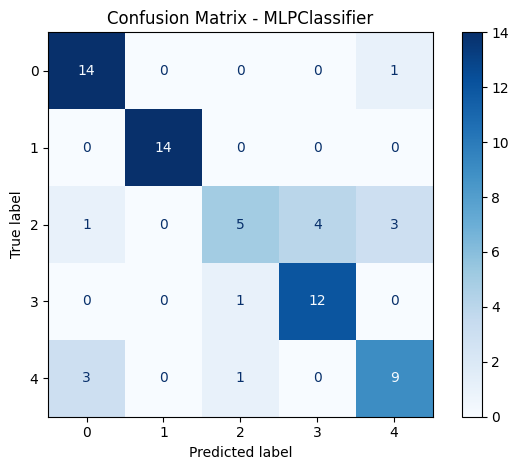

['scaler_optuna_best_relu.pkl']

In [2]:
import pandas as pd
import joblib
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("transformed_land_mines.csv")

# Prepare features and labels
X = df.drop(columns=["M", "V"])
y = df["M"] - 1  # Shift labels from 1–5 to 0–4

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Define the MLP model
clf = MLPClassifier(
    hidden_layer_sizes=(256, 128),
    alpha=1.5533844813198423e-05,
    learning_rate_init=0.012213599390700235,
    max_iter=587,
    activation="relu",
    solver="adam",
    random_state=42
)

# Train the model and record time
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()
print(f"🕒 Training Time: {end_time - start_time:.2f} seconds")

# Evaluate model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Final MLP Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, display_labels=[0, 1, 2, 3, 4], cmap="Blues"
)
plt.title("Confusion Matrix - MLPClassifier")
plt.tight_layout()
plt.show()

# Save model and scaler
joblib.dump(clf, "mlp_optuna_best_relu.pkl")
joblib.dump(scaler, "scaler_optuna_best_relu.pkl")
